E:\Anaconda\Anaconda\envs\env_py2\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


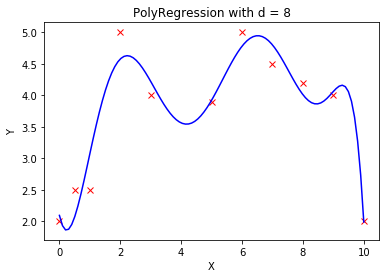

In [11]:
'''
    TEST SCRIPT FOR POLYNOMIAL REGRESSION 1
    AUTHOR Eric Eaton, Xiaoxiang Hu
'''

import numpy as np
import matplotlib.pyplot as plt
from polyreg import PolynomialRegression

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "data/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, 0]
    y = allData[:, 1]

    # regression with degree = d
    d = 8
    model = PolynomialRegression(degree = d, regLambda = 0)
    model.fit(X, y)
    
    # output predictions
    xpoints = np.linspace(np.max(X), np.min(X), 100).T
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.title('PolyRegression with d = '+str(d))
    plt.hold(True)
    plt.plot(xpoints, ypoints, 'b-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()



ValueError: need more than 1 value to unpack

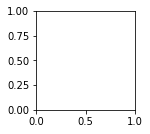

In [3]:
'''
    TEST SCRIPT FOR POLYNOMIAL REGRESSION 1
    AUTHOR Eric Eaton, Xiaoxiang Hu
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from polyreg import PolynomialRegression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from polyreg import learningCurve




#----------------------------------------------------
# Plotting tools

def plotLearningCurve(errorTrain, errorTest, regLambda, degree):
    '''
        plot computed learning curve
    '''
    minX = 3
    maxY = max(errorTest[minX+1:])

    xs = np.arange(len(errorTrain))
    plt.plot(xs, errorTrain, 'r-o')
    plt.hold(True)
    plt.plot(xs, errorTest, 'b-o')
    plt.plot(xs, np.ones(len(xs)), 'k--')
    plt.hold(False)
    plt.legend(['Training Error', 'Testing Error'], loc = 'best')
    plt.title('Learning Curve (d='+str(degree)+', lambda='+str(regLambda)+')')
    plt.xlabel('Training samples')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.ylim((0,maxY))
    plt.xlim((minX,10))


def generateLearningCurve(X, y, degree, regLambda):
    '''
        computing learning curve via leave one out CV
    '''

    n = len(X);
    
    errorTrains = np.zeros((n, n-1));
    errorTests = np.zeros((n, n-1));
    
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    loo = np.array([X_train.shape, X_test.shape])
    itrial = 0
    for train_index, test_index in loo:
        #print("TRAIN indices:", train_index, "TEST indices:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        (errTrain, errTest) = learningCurve(X_train, y_train, X_test, y_test, regLambda, degree)

        errorTrains[itrial, :] = errTrain
        errorTests[itrial, :] = errTest
        itrial = itrial + 1

    errorTrain = errorTrains.mean(axis = 0)
    errorTest = errorTests.mean(axis = 0)

    plotLearningCurve(errorTrain, errorTest, regLambda, degree)




#-----------------------------------------------

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "data/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, 0]
    y = allData[:, 1]

    # generate Learning curves for different params
    plt.subplot(2, 3, 1)
    generateLearningCurve(X, y, 1, 0);
    plt.subplot(2, 3, 2)
    generateLearningCurve(X, y, 4, 0);
    plt.subplot(2, 3, 3)
    generateLearningCurve(X, y, 8, 0);
    plt.subplot(2, 3, 4)
    generateLearningCurve(X, y, 8, .1);
    plt.subplot(2, 3, 5)
    generateLearningCurve(X, y, 8, 1);
    plt.subplot(2, 3, 6)
    generateLearningCurve(X, y, 8, 100);
    plt.show()
